In [15]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Import Dataset 

In [16]:
moviedata = pd.read_csv('Final-CLEAN-Dataset.csv')
moviedata.head(n = 10)

,ID,Title,Age of Movie,Age Category,IMDb,Rotten,Availability,Directors,Genres,Country,Language,Runtime
0,1,Inception,12,13+,8.8,87.0,1,Christopher Nolan,Action,United States,English,148.0
1,2,The Matrix,23,18+,8.7,87.0,1,Lana Wachowski,Action,United States,English,136.0
2,3,Avengers: Infinity War,4,13+,8.5,84.0,1,Anthony Russo,Action,United States,English,149.0
3,4,Back to the Future,37,7+,8.5,96.0,1,Robert Zemeckis,Adventure,United States,English,116.0
4,5,"The Good, the Bad and the Ugly",56,18+,8.8,97.0,2,Sergio Leone,Western,Italy,Italian,161.0
5,6,Spider-Man: Into the Spider-Verse,4,7+,8.4,97.0,1,Bob Persichetti,Animation,United States,English,117.0
6,7,The Pianist,20,18+,8.5,95.0,2,Roman Polanski,Biography,United Kingdom,English,150.0
7,8,Django Unchained,10,18+,8.4,87.0,1,Quentin Tarantino,Drama,United States,English,165.0
8,9,Raiders of the Lost Ark,41,7+,8.4,95.0,1,Steven Spielberg,Action,United States,English,115.0
9,10,Inglourious Basterds,13,18+,8.3,89.0,1,Quentin Tarantino,Adventure,Germany,English,153.0


In [17]:
moviedata.describe()

,ID,Age of Movie,IMDb,Rotten,Availability,Runtime
count,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000
mean,4383.358711,14.583693,6.230148,60.207163,1.055796,100.980202
std,2681.552727,13.990212,1.078126,22.265142,0.234205,22.003043
min,1.000000,1.000000,1.100000,2.000000,1.000000,2.000000
25%,1987.750000,5.000000,5.600000,45.000000,1.000000,90.000000
50%,4451.500000,10.000000,6.300000,61.000000,1.000000,99.000000
75%,6802.250000,19.000000,7.000000,77.000000,1.000000,110.250000
max,9380.000000,120.000000,9.000000,100.000000,3.000000,359.000000


In [18]:
# Quantile 25% and 75%
Q1 = moviedata['Runtime'].quantile(0.25)
Q3 = moviedata['Runtime'].quantile(0.75)

#Interquartile range (IQR)
IQR = Q3 - Q1

# Remove the outliers
moviedata = moviedata.drop(moviedata[(moviedata['Runtime'] <= Q1 - 1.5*IQR) | (moviedata['Runtime'] >= Q3 + 1.5*IQR)].index)
moviedata

,ID,Title,Age of Movie,Age Category,IMDb,Rotten,Availability,Directors,Genres,Country,Language,Runtime
1,2,The Matrix,23,18+,8.7,87.0,1,Lana Wachowski,Action,United States,English,136.0
3,4,Back to the Future,37,7+,8.5,96.0,1,Robert Zemeckis,Adventure,United States,English,116.0
5,6,Spider-Man: Into the Spider-Verse,4,7+,8.4,97.0,1,Bob Persichetti,Animation,United States,English,117.0
8,9,Raiders of the Lost Ark,41,7+,8.4,95.0,1,Steven Spielberg,Action,United States,English,115.0
10,11,Taxi Driver,46,18+,8.3,95.0,1,Martin Scorsese,Crime,United States,English,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5543,9302,Own the Room,1,7+,6.4,46.0,1,Cristina Costantini,Documentary,United States,English,91.0
5544,9310,Unidentified Flying Oddball,43,all,5.2,45.0,1,Russ Mayberry,Adventure,United States,English,93.0
5546,9315,'Twas the Night,21,all,5.3,45.0,1,Nick Castle,Comedy,United States,English,84.0
5551,9345,The Story of the Animated Drawing,67,all,7.6,41.0,1,William Beaudine,Adventure,United States,English,60.0


In [19]:
moviedata.describe()

,ID,Age of Movie,IMDb,Rotten,Availability,Runtime
count,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000
mean,4354.276074,14.524156,6.179870,59.836273,1.057132,100.319018
std,2641.232006,13.671695,1.064067,22.375588,0.237022,14.473748
min,2.000000,1.000000,1.100000,2.000000,1.000000,60.000000
25%,1982.750000,5.000000,5.600000,45.000000,1.000000,90.000000
50%,4395.500000,10.000000,6.300000,60.000000,1.000000,98.000000
75%,6769.250000,19.000000,6.900000,76.000000,1.000000,109.000000
max,9354.000000,102.000000,9.000000,100.000000,3.000000,140.000000


In [20]:
moviedata = moviedata.reset_index()
moviedata = moviedata.drop(columns = ['ID', 'index'])
ID = []
for i in range(1, len(moviedata) + 1):
    ID.append(i)
moviedata.insert(0, "ID", ID)
moviedata

,ID,Title,Age of Movie,Age Category,IMDb,Rotten,Availability,Directors,Genres,Country,Language,Runtime
0,1,The Matrix,23,18+,8.7,87.0,1,Lana Wachowski,Action,United States,English,136.0
1,2,Back to the Future,37,7+,8.5,96.0,1,Robert Zemeckis,Adventure,United States,English,116.0
2,3,Spider-Man: Into the Spider-Verse,4,7+,8.4,97.0,1,Bob Persichetti,Animation,United States,English,117.0
3,4,Raiders of the Lost Ark,41,7+,8.4,95.0,1,Steven Spielberg,Action,United States,English,115.0
4,5,Taxi Driver,46,18+,8.3,95.0,1,Martin Scorsese,Crime,United States,English,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5211,5212,Own the Room,1,7+,6.4,46.0,1,Cristina Costantini,Documentary,United States,English,91.0
5212,5213,Unidentified Flying Oddball,43,all,5.2,45.0,1,Russ Mayberry,Adventure,United States,English,93.0
5213,5214,'Twas the Night,21,all,5.3,45.0,1,Nick Castle,Comedy,United States,English,84.0
5214,5215,The Story of the Animated Drawing,67,all,7.6,41.0,1,William Beaudine,Adventure,United States,English,60.0


In [21]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            5216 non-null   int64  
 1   Title         5216 non-null   object 
 2   Age of Movie  5216 non-null   int64  
 3   Age Category  5216 non-null   object 
 4   IMDb          5216 non-null   float64
 5   Rotten        5216 non-null   float64
 6   Availability  5216 non-null   int64  
 7   Directors     5216 non-null   object 
 8   Genres        5216 non-null   object 
 9   Country       5216 non-null   object 
 10  Language      5216 non-null   object 
 11  Runtime       5216 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 489.1+ KB


Using Uni-Variate Linear Regression, test out various Numeric Variables to see which Variables can predict the IMDb Scores the most accurately.

Set up the Regression Problem with Train & Test Datasets

Intercept (Age of Movie):     b = [6.00880129]
Coefficients (Age of Movie):  a = [[0.01056727]]

              Age of Movie      IMDb
Age of Movie      1.000000  0.135896
IMDb              0.135896  1.000000

Goodness of Fit of Age of Movie (Train)
Explained Variance (R^2) 	: 0.01846762082325837
Mean Squared Error (MSE) 	: 1.13910035252226

Goodness of Fit of Age of Movie (Test)
Explained Variance (R^2) 	: 0.002814254814031192
Mean Squared Error (MSE) 	: 1.0099314788260767



Intercept (Runtime):     b = [4.31548964]
Coefficients (Runtime):  a = [[0.01848698]]

         Runtime     IMDb
Runtime  1.00000  0.25062
IMDb     0.25062  1.00000

Goodness of Fit of Runtime (Train)
Explained Variance (R^2) 	: 0.06281051841821772
Mean Squared Error (MSE) 	: 1.0871008213679267

Goodness of Fit of Runtime (Test)
Explained Variance (R^2) 	: 0.06253921902303072
Mean Squared Error (MSE) 	: 0.9546434592546676



Intercept (Rotten):     b = [4.50995036]
Coefficients (Rotten):  a = [[0.02785617]]

     

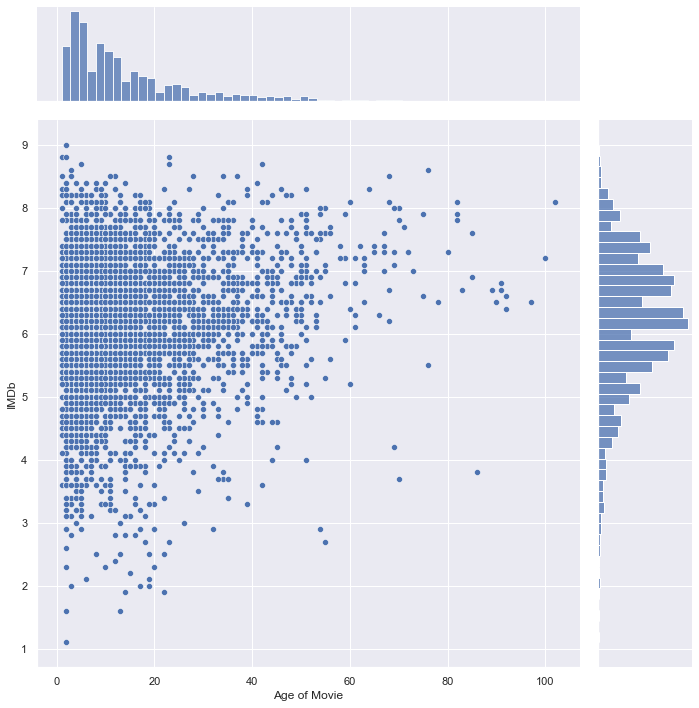

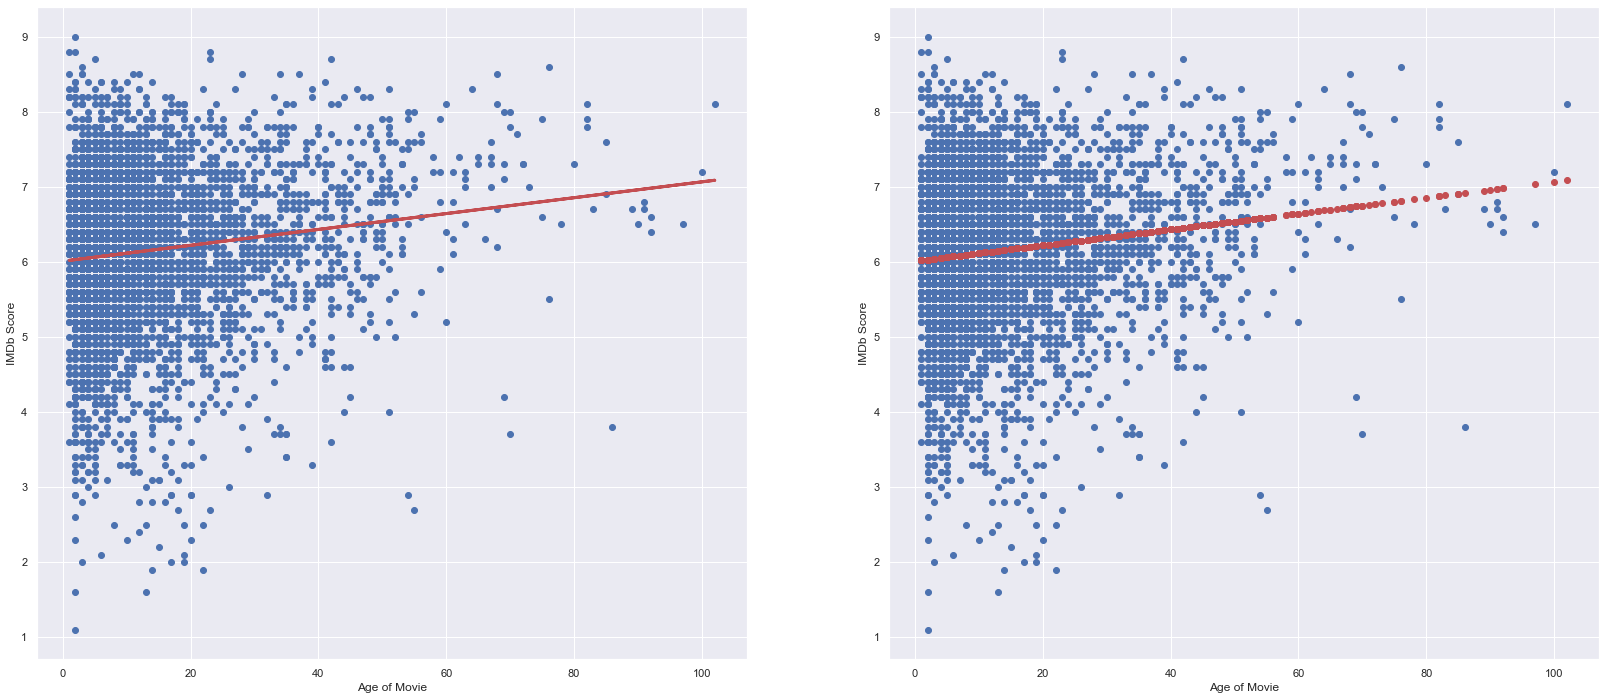

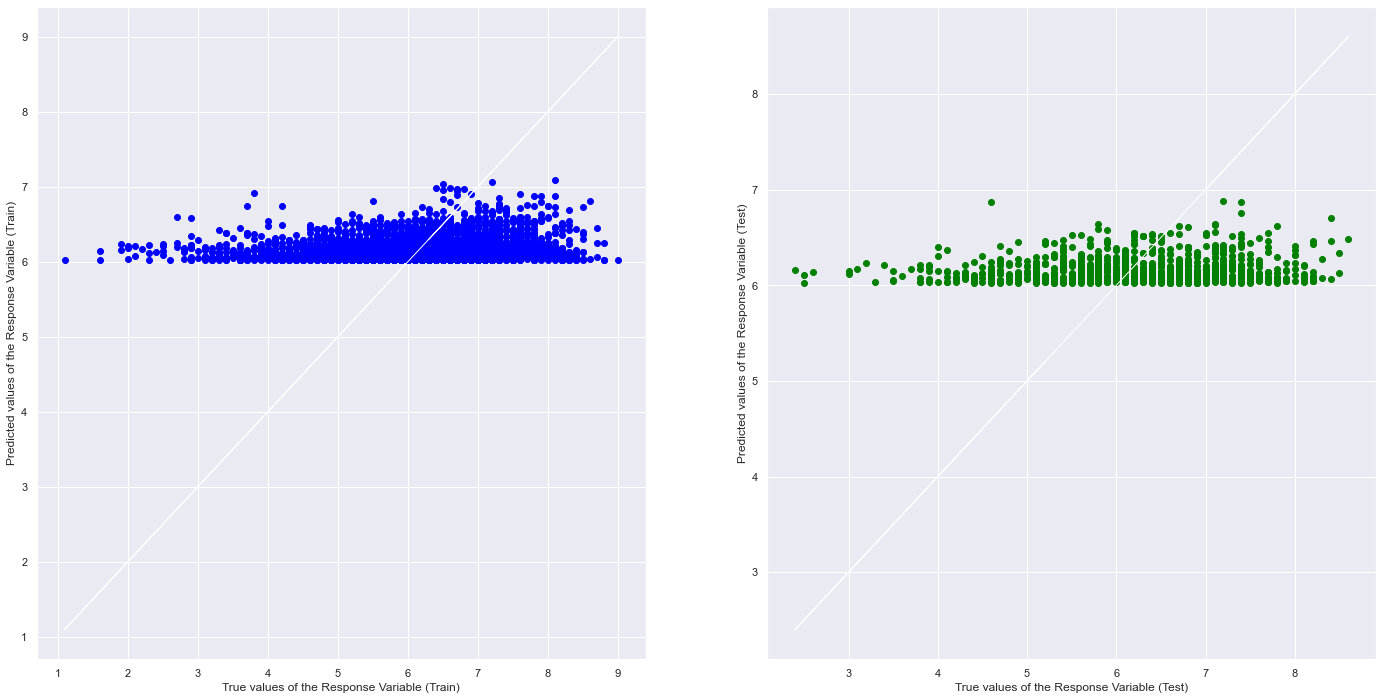

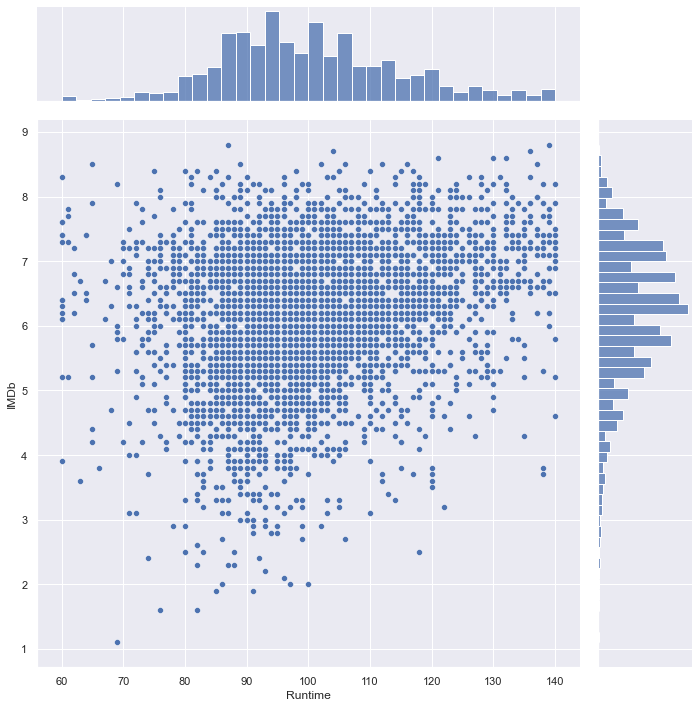

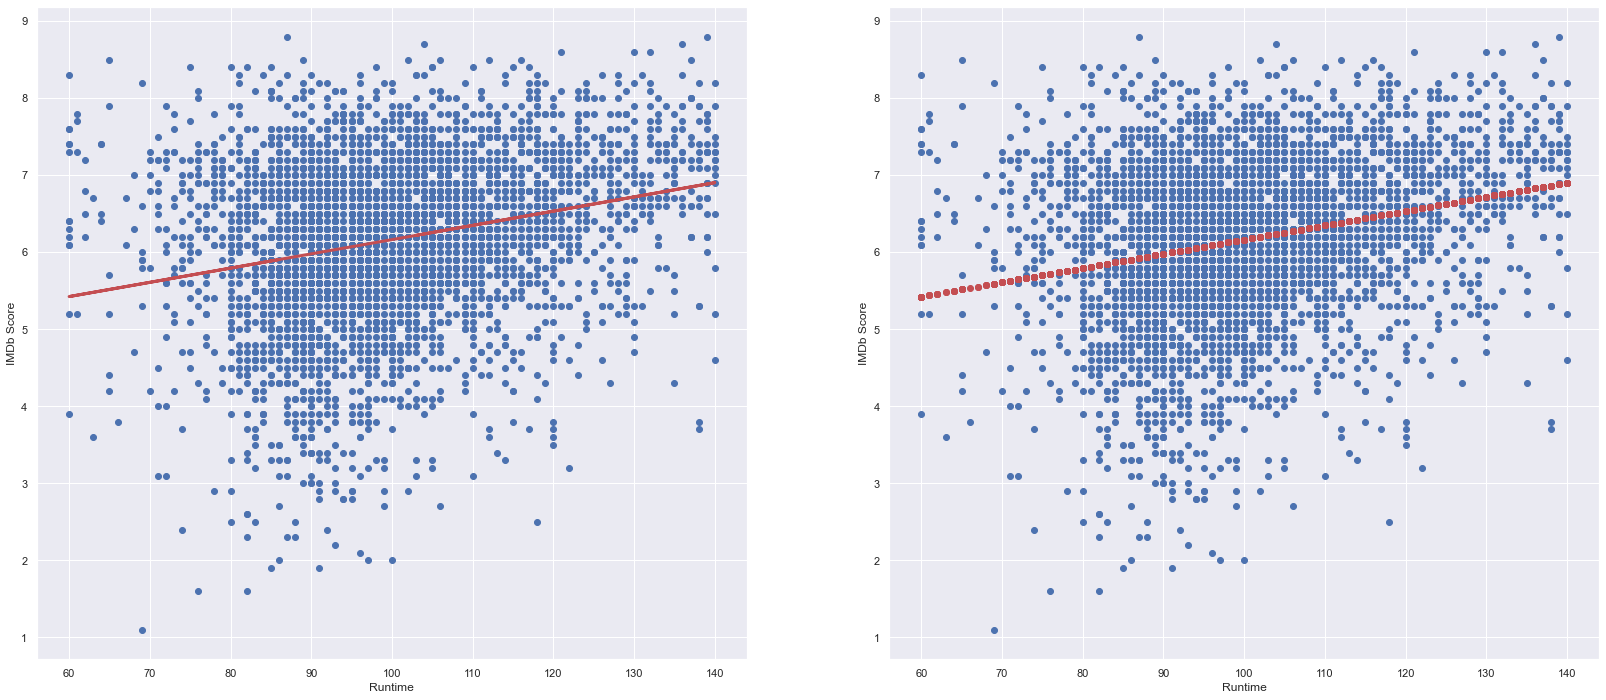

In [ ]:
# Recall the Total-HP Dataset
IMDbScore = pd.DataFrame(moviedata['IMDb'])          # Response
Features = ['Age of Movie', 'Runtime', 'Rotten']     # Predictor

mse_train_list = []
mse_test_list = []

for col in Features:
    # Split the Dataset into Train and Test (Train: 80%, Test: 20%)
    Predictor = pd.DataFrame(moviedata[col])
    X_train, X_test, y_train, y_test = train_test_split(Predictor, IMDbScore, train_size = 0.8)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept ({}):     b = {}'.format(col, linreg.intercept_))
    print('Coefficients ({}):  a = {}'.format(col, linreg.coef_))
    print()

    # Create a joint dataframe by concatenating the two variables
    jointdf = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)
    jointdf1 = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)
    # Calculate the correlation between the two columns/variables
    print(jointdf.corr())
    print()

    # Jointplot of Total Train against HP Train
    sb.jointplot(data = jointdf1, x = col, y = "IMDb", height = 10)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train

    y_train_pred = linreg.predict(X_train)

    # Plot the Linear Regression line
    f, axes = plt.subplots(1, 2, figsize=(28, 12))

    axes[0].scatter(X_train, y_train)
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("IMDb Score")

    axes[1].scatter(X_train, y_train)
    axes[1].scatter(X_train, y_train_pred, color = "r")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("IMDb Score")

    # Predict Total values corresponding to HP
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    mse_train = mean_squared_error(y_train, y_train_pred)
    print("Goodness of Fit of {} (Train)".format(col))
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mse_train)
    mse_train_list.append((col, mse_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print("Goodness of Fit of {} (Test)".format(col))
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mse_test)
    mse_test_list.append((col, mse_test))
    print('\n' * 2)

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

In [ ]:
# Find the variable with the most accurate model (the model whose MSE is the smallest)
def most_accurate(mse_train_list, mse_test_list):
    a = []
    b = []
    
    for i in mse_train_list:
        a.append(i[1])
    
    for i in mse_test_list:
        b.append(i[1]) 
        
    best_train = min(a)
    best_test = min(b)
   
    for i in range(0, len(mse_train_list)):
        if mse_train_list[i][1] == best_train:
            best_train = mse_train_list[i]
            
    for i in range(0, len(mse_test_list)):
        if mse_test_list[i][1] == best_test:
            best_test = mse_test_list[i]
    return best_train, best_test

In [ ]:
most_accurate(mse_train_list, mse_test_list)

Conclude: Rotten Tomatoes Score model is the most accurate.